## Обзоры на приложения в Google Play Store
https://www.kaggle.com/gauthamp10/google-playstore-apps 
Подготовьте список самых популярных приложений по категориям
Какие приложения самые дорогие (и категории)
Какие категории содержат самое большое количество приложений без отзывов 


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import colors
from pygooglechart import PieChart3D
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [195]:
df = pd.read_csv('Google-Playstore.csv.zip')

In [196]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [197]:
df.shape

(2312944, 24)

In [198]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [199]:
df.drop(['Developer Id', 'Developer Website',
       'Developer Email'], inplace = True, axis=1)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              object 
 12  Minimum Android   object 
 13  Released          object 
 14  Last Updated      object 
 15  Content Rating    object 
 16  Privacy Policy    object 
 17  Ad Supported      bool   
 18  In App Purchases  bool   
 19  Editors Choice    bool   
 20  Scraped Time      object 
dtypes: bool(4), float64(4), int64(1), object(12)
memory usage: 308.8+ MB


In [201]:
# проверка пропусков
(df.isnull().sum()/df.shape[0])*100

App Name             0.000086
App Id               0.000000
Category             0.000000
Rating               0.989345
Rating Count         0.989345
Installs             0.004626
Minimum Installs     0.004626
Maximum Installs     0.000000
Free                 0.000000
Price                0.000000
Currency             0.005837
Size                 0.008474
Minimum Android      0.282324
Released             3.071972
Last Updated         0.000000
Content Rating       0.000000
Privacy Policy      18.199879
Ad Supported         0.000000
In App Purchases     0.000000
Editors Choice       0.000000
Scraped Time         0.000000
dtype: float64

In [202]:
# удаление дубликатов и пропусков
df.drop_duplicates(inplace=True) 
df.dropna(inplace=True)

In [203]:
df.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Privacy Policy      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64

In [204]:
print('Количество категорий приложений в Google Play Store :',df['Category'].nunique())
print('Количество приложений в Google Play Store :',df['App Name'].count())

Количество категорий приложений в Google Play Store : 48
Количество приложений в Google Play Store : 1829843


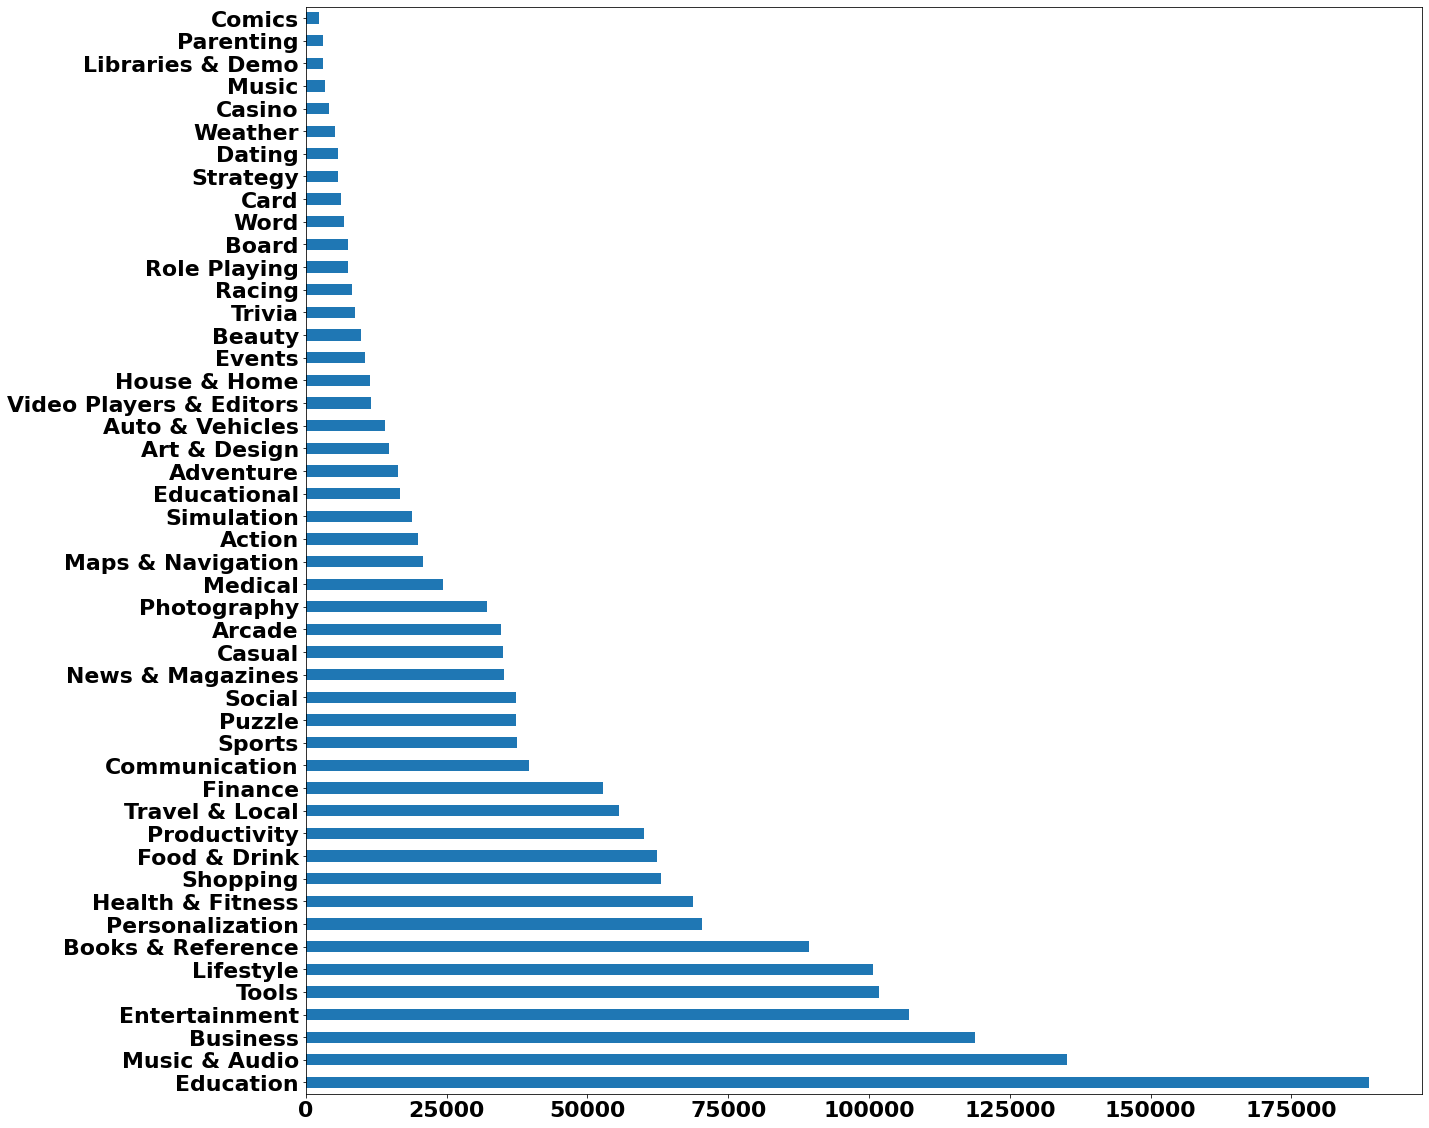

In [205]:
font = {'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig = plt.subplots(figsize=(20, 20))
df.Category.value_counts().plot.barh()
ax.set(xlabel = 'Количество приложений Google Play Store', title = 'Количество приложений по категориям Google Play Store')
plt.show()

[Text(0.5, 0, 'Количество приложений Google Play Store'),
 Text(0.5, 1.0, 'Количество приложений по категориям Google Play Store')]

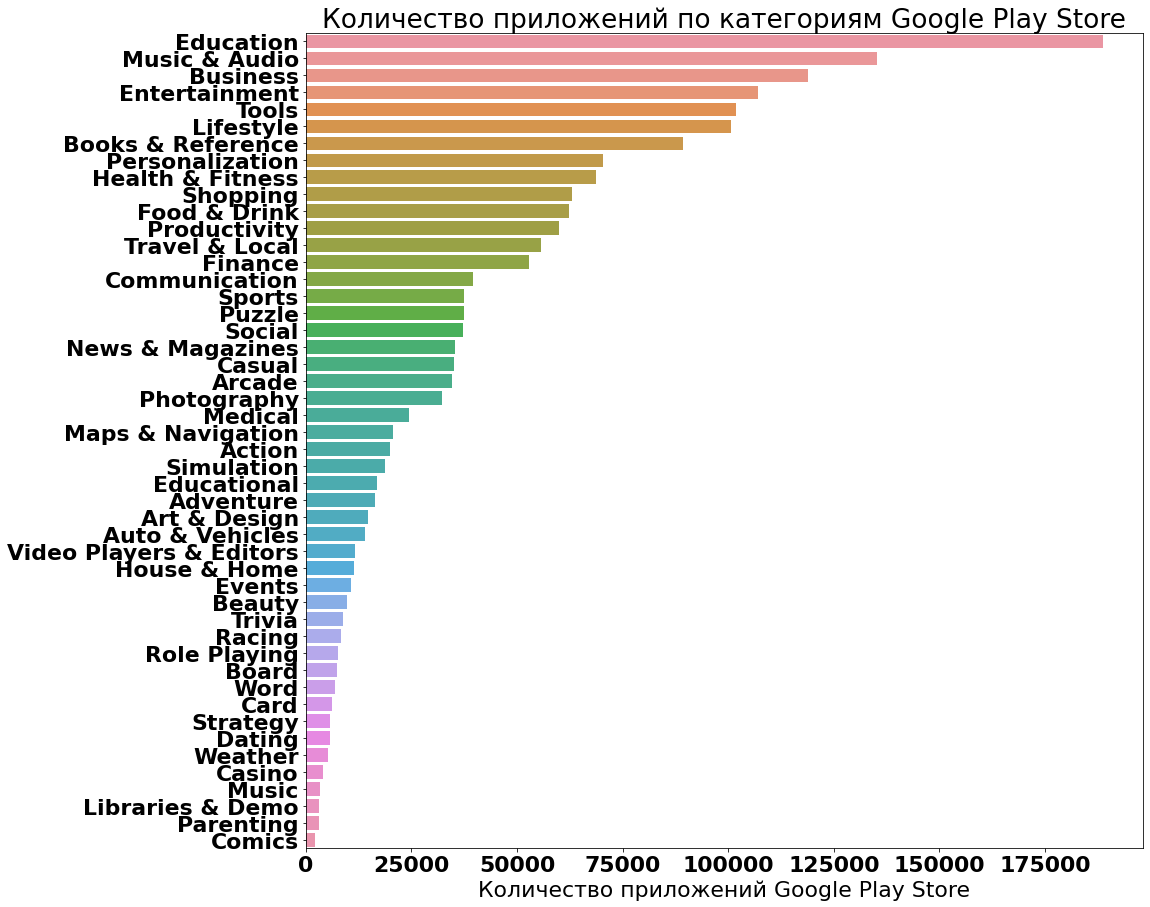

In [206]:
# Рассмотрим общее количество приложений по категориям
fig = plt.subplots(figsize=(15, 15))
ax = sns.barplot(x = df['Category'].value_counts().values, 
                 y = df['Category'].value_counts().index)
ax.set(xlabel = 'Количество приложений Google Play Store', title = 'Количество приложений по категориям Google Play Store')

<AxesSubplot:>

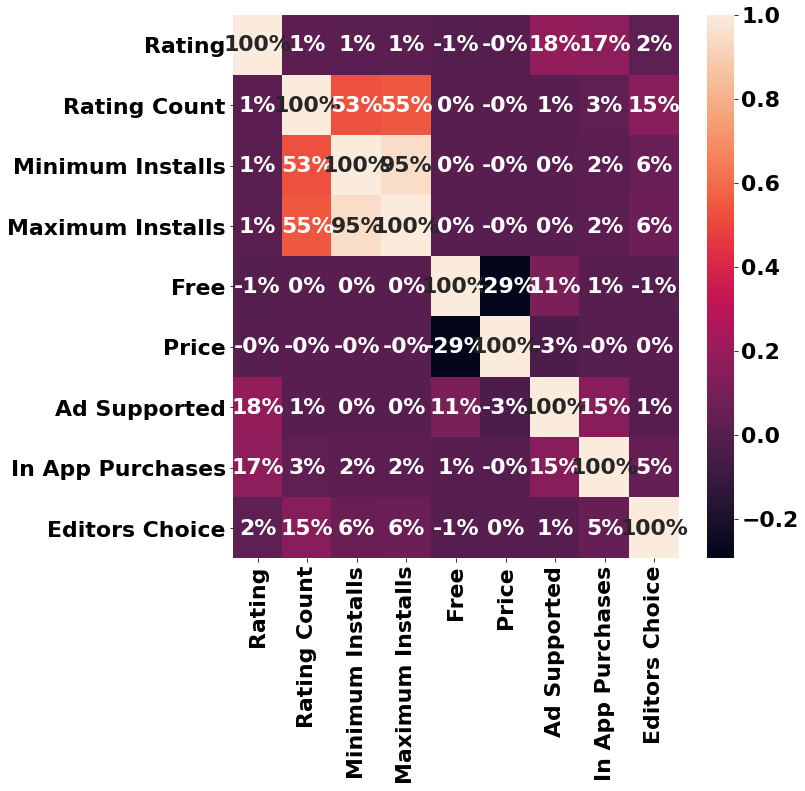

In [207]:
# Визуализация граифк корреляции
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

In [208]:
# 1. Самые популярные приложения по категориям

In [209]:
df_like = (df.groupby(['Category','App Name'])['Maximum Installs'].agg(['max']).sort_values(by='max', ascending=False).reset_index().drop_duplicates('Category', keep='first'))

In [210]:
df_like['Category/App Name'] = df_like.agg('{0[Category]} / {0[App Name]}'.format, axis=1)

In [211]:
df_like

,Category,App Name,max,Category/App Name
0,Tools,Google Play services,12057627016,Tools / Google Play services
1,Video Players & Editors,YouTube,9766230924,Video Players & Editors / YouTube
4,Communication,Google Chrome: Fast & Secure,8925640788,Communication / Google Chrome: Fast & Secure
6,Productivity,Google Drive,7028265259,Productivity / Google Drive
9,Photography,Google Photos,5754179589,Photography / Google Photos
12,Entertainment,Google Play Games,4605543029,Entertainment / Google Play Games
15,Social,Currents,3929716163,Social / Currents
18,Books & Reference,"Google Play Books - Ebooks, Audiobooks, and Co...",3202676731,Books & Reference / Google Play Books - Ebooks...
19,News & Magazines,Google News - Top world & local news headlines,2961820154,News & Magazines / Google News - Top world & l...
22,Personalization,Samsung One UI Home,2158959897,Personalization / Samsung One UI Home


Text(0, 0.5, 'Название категории / приложения')

C:\Users\UserNC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\UserNC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0, flags=flags)


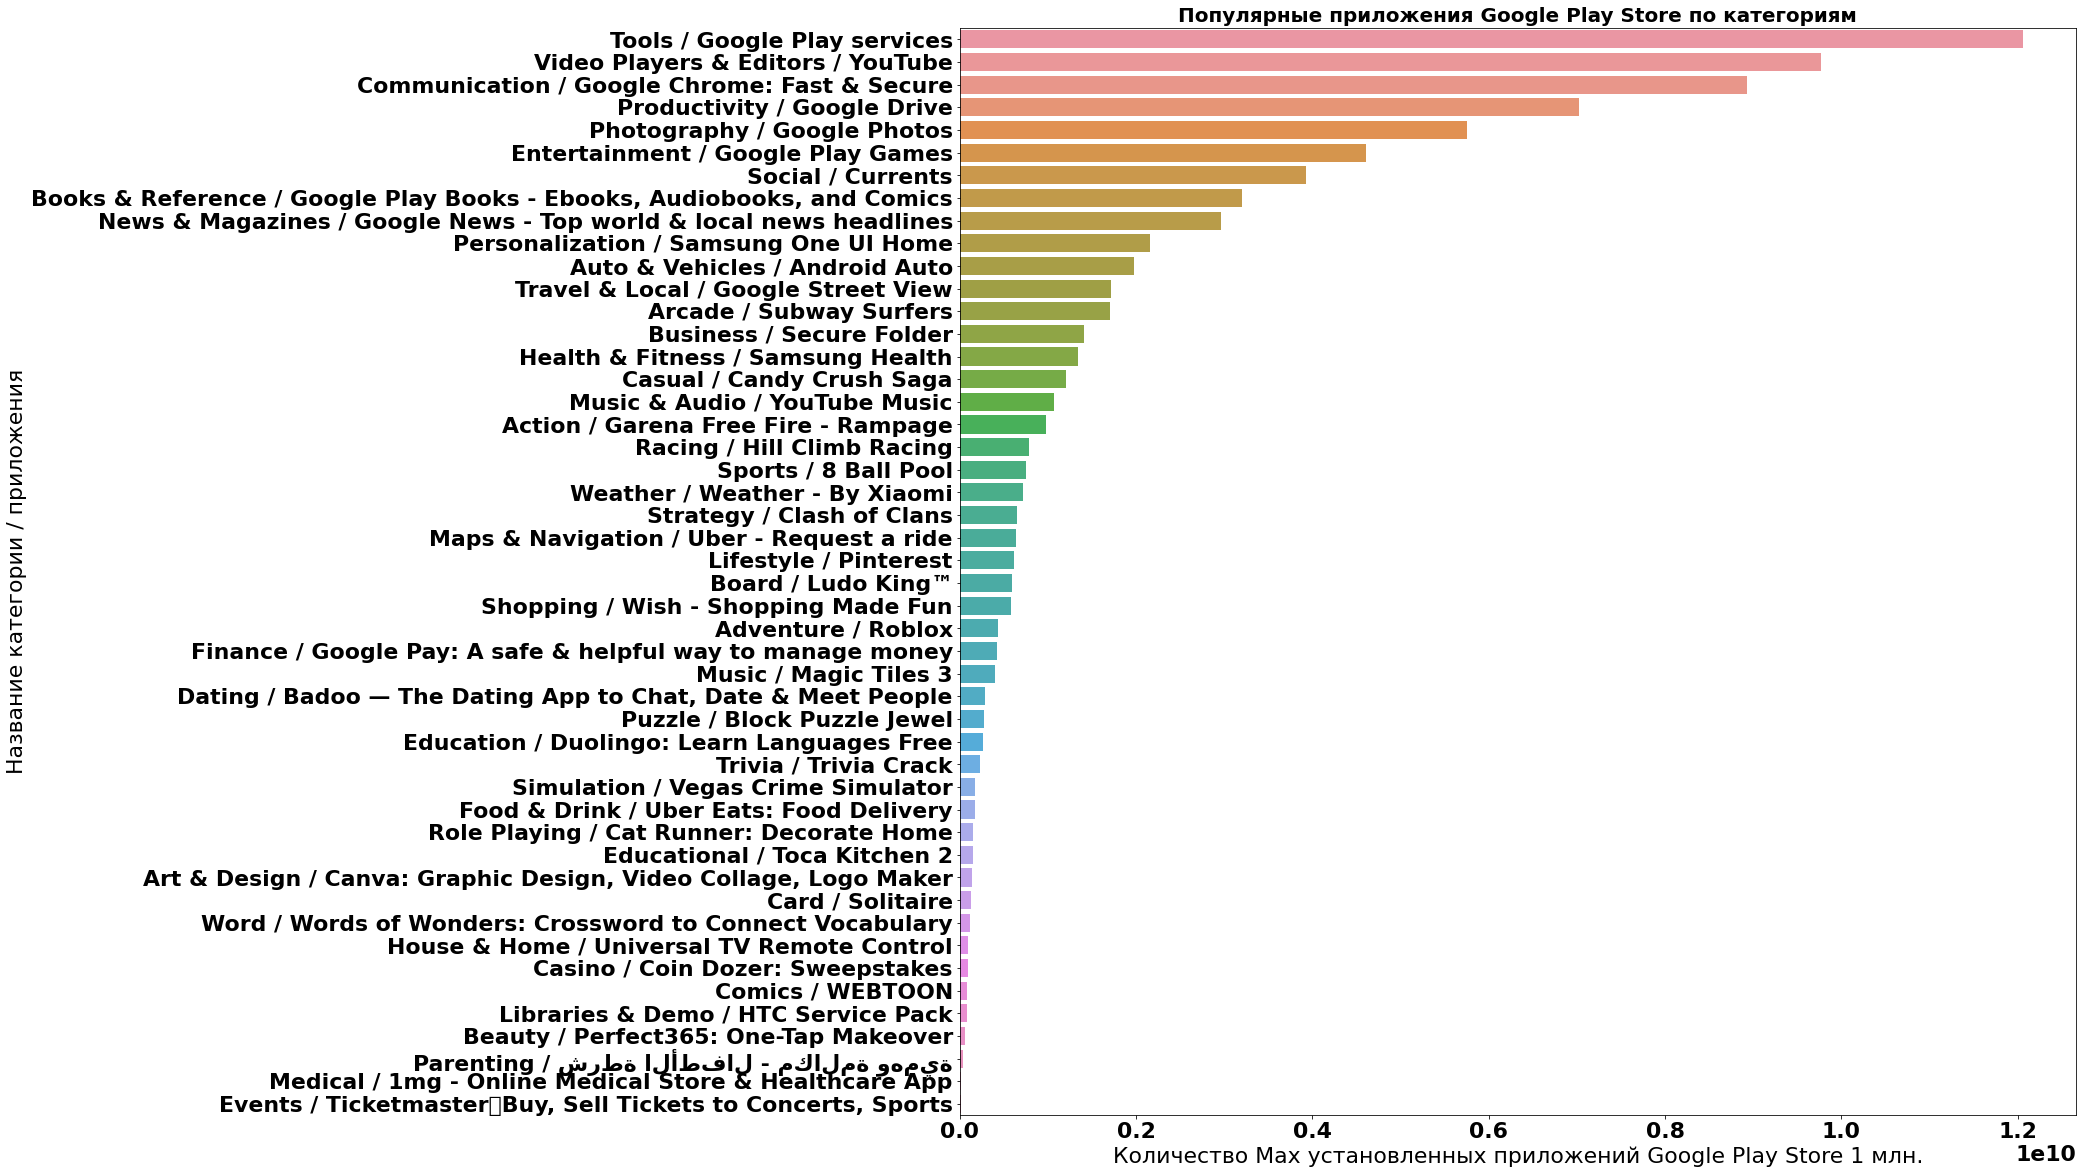

In [212]:
# Построим график популярных приложений Google Play Store по категориям
plt.figure(figsize=(20,20))
sns.barplot(data=df_like,y='Category/App Name',x='max')
plt.title('Популярные приложения Google Play Store по категориям',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Количество Мах установленных приложений Google Play Store 1 млн.')
plt.ylabel('Название категории / приложения')

In [213]:
 # По графику видно, что максимально загружаемое приложение - Google Play services. 
# И это потому, что оно использжуется для обновления приложений Google apps из Google Play. 
df.loc[df['Maximum Installs']==df['Maximum Installs'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Size,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,Varies with device,Varies with device,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


In [214]:
# Топ-5 категорий с большим числом приложений

In [215]:
df_top5 = df['Category'].value_counts()[:5]

In [216]:
df_top5

Education        188709
Music & Audio    135127
Business         118894
Entertainment    107137
Tools            101734
Name: Category, dtype: int64

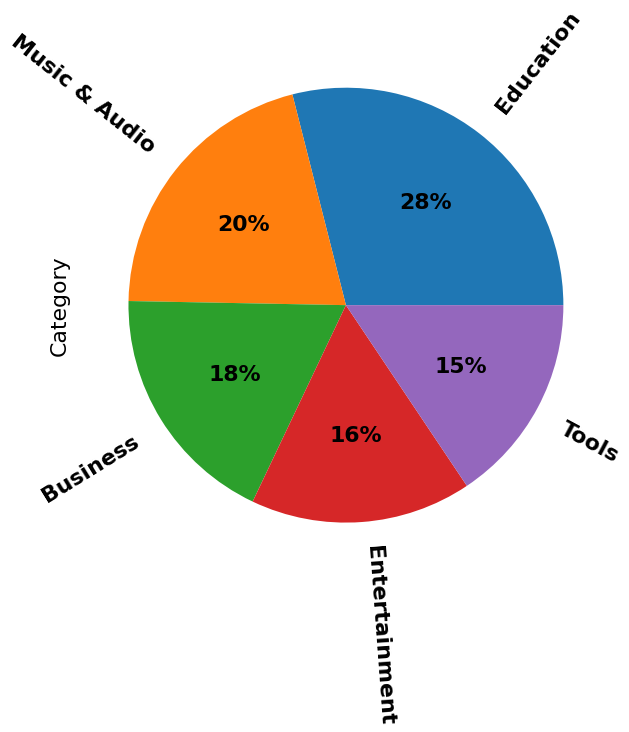

In [217]:
from pygooglechart import PieChart3D
fig= plt.figure(figsize=(10,10))
df_top5.plot.pie(rotatelabels=True,autopct="%2i%%")
plt.show()

In [ ]:
# Отношение между установленными приложениями и рейтингом приложений

In [241]:
df['Installs'] = df['Installs'].astype({'Installs': 'string'})

In [242]:
df.Installs.head()

0       10+
1    5,000+
2       50+
4      100+
5       50+
Name: Installs, dtype: string

In [254]:
df['Rating'] = df['Rating'].astype({'Rating': 'float64'})

In [255]:
df['Rating'].describe()

count    1.829843e+06
mean     2.237685e+00
std      2.099072e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.100000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [256]:
df[df['Rating']>5]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Size,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


TypeError: can only concatenate str (not "float") to str

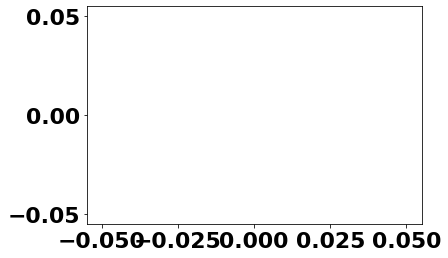

In [257]:
sns.regplot(data = df, x = 'Installs', y = 'Rating', truncate=False, x_jitter=0.5 )


C:\Users\UserNC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Плотность')

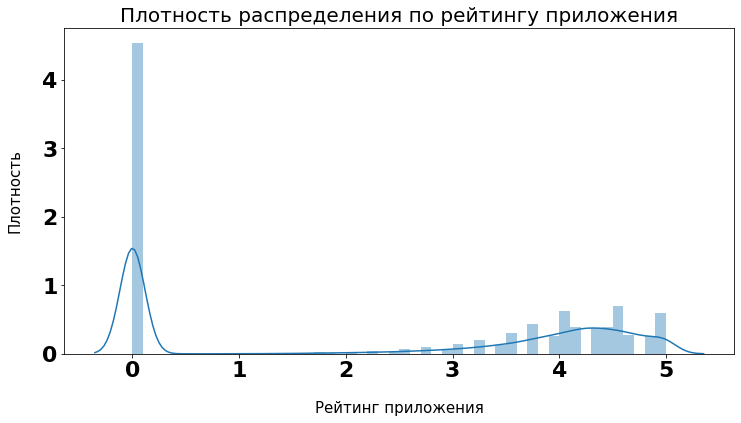

In [258]:
# Рассмотрим рейтинг приложений
plt.figure(figsize=(12,6))
sns.distplot(df.Rating)
plt.title('Плотность распределения по рейтингу приложения', fontsize=20)
plt.xlabel('Рейтинг приложения', fontsize=15, labelpad=20)
plt.ylabel('Плотность', fontsize=15, labelpad=20)
# Из плотности распределения рейтинга приложений видно, что максимально приложений без рейтинга, то есть без оценок клиента.

In [ ]:
# 2. Самые дорогие приложения (и категории)

In [225]:
# Для начала пронанализируем цену приложений 
price = df[df['Price'] > 0]
print('Приложение с самой высокой ценой :',price.Price.max())
print('Приложение с самой низкой ценой :',price.Price.min())
print('Средняя стоимость на приложения :',price.Price.mean())

Приложение с самой высокой ценой : 400.0
Приложение с самой низкой ценой : 0.204735
Средняя стоимость на приложения : 6.010962392801638


In [227]:
from pygooglechart import PieChart3D
def python_pie3D() :
  chart = PieChart3D(250, 250)

  # pass your data to the chart object
  chart.df['Free'].value_counts()

  # make labels for the slices
  chart.set_pie_labels(split())


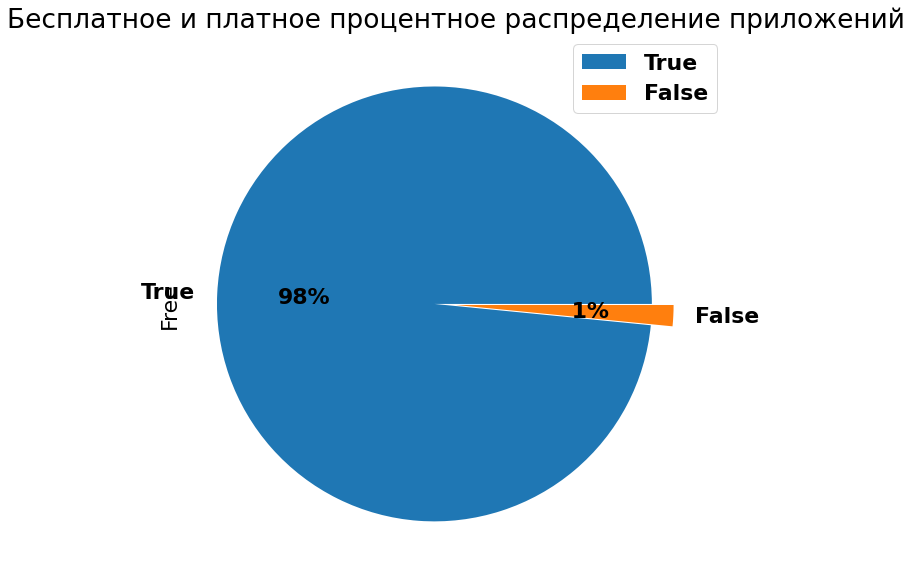

In [230]:
# Круговая диаграмма бесплатных и платных приложений
plt.figure(figsize=(10,10))
explode=[0.1,0]
df['Free'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.title("Бесплатное и платное процентное распределение приложений")
plt.show()

In [231]:
# Найдем ТОп-5 самых дорогих приложенй
df.sort_values('Price', ascending=False).iloc[:5,:]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Size,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
544468,MESH Connect,com.tecit.android.bluepiano.meshconnectfull,Productivity,0.0,0.0,10+,10.0,25,False,400.00,...,20M,4.4 and up,"Sep 7, 2017","Sep 07, 2017",Everyone,http://www.go-evo.com/privacy,False,False,False,2021-06-16 05:15:22
1859780,AudD,io.audd.android,Music & Audio,3.2,66.0,"1,000+",1000.0,4397,False,399.99,...,2.1M,5.0 and up,"Feb 17, 2018","Feb 17, 2018",Everyone,https://audd.io/privacy/,False,False,False,2021-06-16 06:24:31
921941,Luxsure,com.abestenergy.luxsure,Entertainment,0.0,0.0,1+,1.0,1,False,399.99,...,37M,5.0 and up,"Apr 21, 2020","May 08, 2020",Everyone,https://sites.google.com/view/luxsure-terms-an...,False,False,False,2021-06-16 11:05:57
1327436,Youmeunit PRO — ver.4U4M34353RY1,com.youmeunit.pro,Social,0.0,0.0,0+,0.0,0,False,399.99,...,11M,4.4W and up,"Oct 14, 2020","Feb 12, 2021",Everyone,https://docs.google.com/document/d/16rNB5A40UC...,False,True,False,2021-06-15 22:34:28
20127,TEST EGY,com.test.egy,Tools,0.0,0.0,0+,0.0,0,False,399.99,...,16M,5.0 and up,"Jun 21, 2020","Jun 22, 2020",Everyone,Https://www.leilogos.com,False,False,False,2021-06-15 20:39:16


In [232]:
# Рассмотрим, как влияет цена на количество максимально установленных приложений?
df.groupby('Price')['Maximum Installs'].sum().sort_values()
dfFree=df[df['Price']==0]    
print("Общее количество установок, когда apps бесплатно: ",dfFree['Maximum Installs'].sum()) 
dfFree=df[df['Price']!=0]    
print("Общее количество установок, когда apps не бесплатно: ", dfFree['Maximum Installs'].sum())


Общее количество установок, когда apps бесплатно:  666388136612
Общее количество установок, когда apps не бесплатно:  647289621


In [233]:
df['Price'].value_counts(sort=True,bins=10).to_frame()

,Price
"(-0.401, 40.0]",1829320
"(40.0, 80.0]",320
"(80.0, 120.0]",82
"(120.0, 160.0]",31
"(360.0, 400.0]",27
"(160.0, 200.0]",23
"(280.0, 320.0]",13
"(240.0, 280.0]",12
"(320.0, 360.0]",8
"(200.0, 240.0]",7


In [323]:
app_expensive = df.groupby(['App Name'])['Price'].max().sort_values(ascending  = False).reset_index()
app_expensive = app_expensive.head(20)


C:\Users\UserNC\anaconda3\lib\site-packages\joypy\joyplot.py:543: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  last_axis = fig.add_subplot(1, 1, 1)


<Figure size 720x720 with 0 Axes>

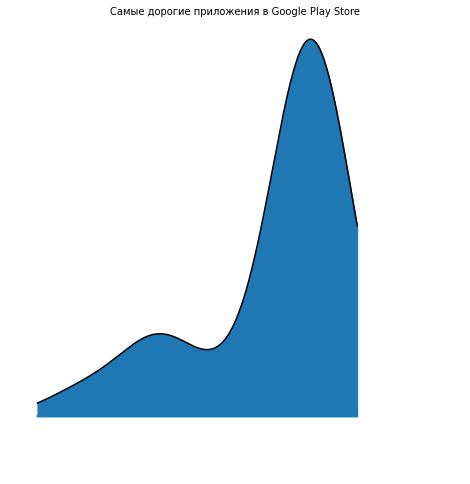

In [324]:
import joypy
plt.figure(figsize=(10,10))
fig, axes = joypy.joyplot(app_expensive, column= ['Price','App Name'], figsize=(7,7))
plt.title('Самые дорогие приложения в Google Play Store', fontsize=10)
plt.xlabel('Цена')
plt.ylabel('Приложение')
plt.xlim([380, 410]) 
plt.show()

(380.0, 410.0)

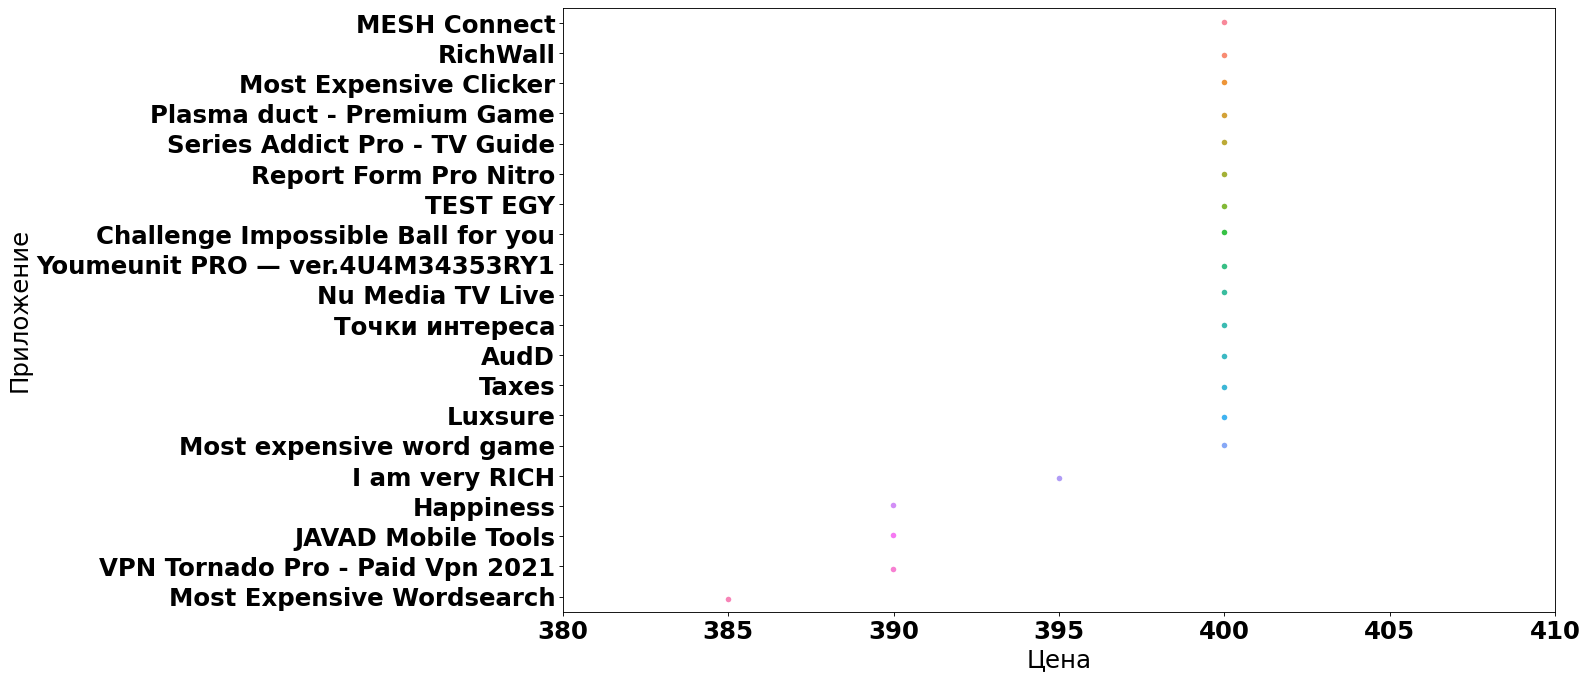

In [325]:
fig = plt.subplots(figsize=(16, 10), dpi= 80)
sns.stripplot(x = app_expensive['Price'], y = app_expensive['App Name'])
plt.xlabel('Цена')
plt.ylabel('Приложение')
plt.xlim([380, 410]) 

(380.0, 400.0)

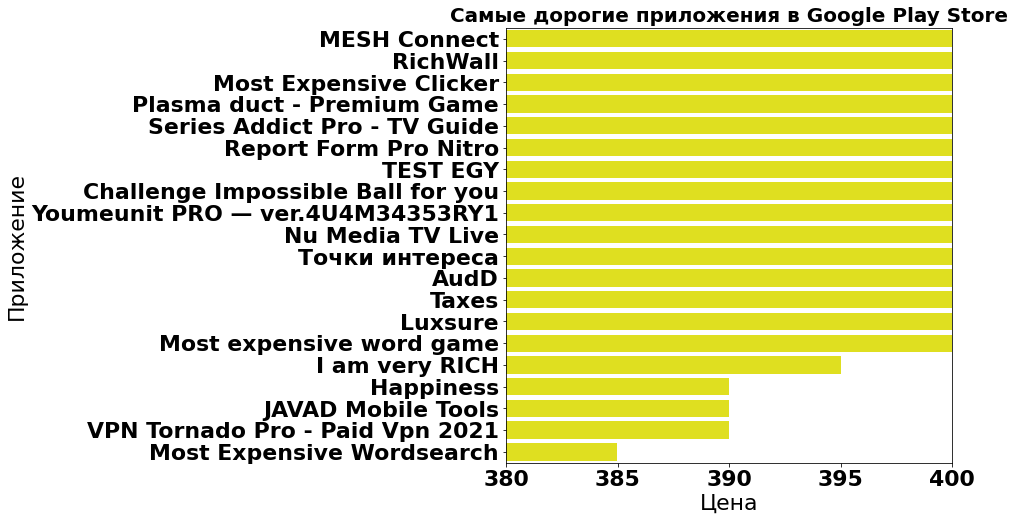

In [326]:
plt.figure(figsize=(8,8))
sns.barplot(x = app_expensive['Price'], y = app_expensive['App Name'],color = 'yellow')
plt.title('Самые дорогие приложения в Google Play Store',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Цена')
plt.ylabel('Приложение')
plt.xlim([380, 400]) 

In [ ]:
# Самые дорогие приложения по категориям

In [309]:
df.category_expensive = df.groupby('Category')['Price'].max().sort_values(ascending=False)

<ipython-input-309-9befce396be8>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.category_expensive = df.groupby('Category')['Price'].max().sort_values(ascending=False)


In [310]:
df.category_expensive.head(10)

Category
Productivity         400.00
Dating               399.99
Arcade               399.99
Tools                399.99
Social               399.99
Puzzle               399.99
Board                399.99
Business             399.99
Music & Audio        399.99
Maps & Navigation    399.99
Name: Price, dtype: float64

In [327]:
plt.figure(figsize=(10,10), dpi= 80)
sns.violinplot(x='Price', y='Category', data=df.category_expensive, scale='width', inner='quartile')
plt.title('Самые дорогие приложения по категориям', fontsize=22)
plt.show()

ValueError: Could not interpret input 'Price'

<Figure size 800x800 with 0 Axes>

In [ ]:
# 3.Категории содержащие самое большое количество приложений без отзывов

In [54]:
df['Editors Choice'].describe()

count     1287191
unique          2
top         False
freq      1286417
Name: Editors Choice, dtype: object

[]

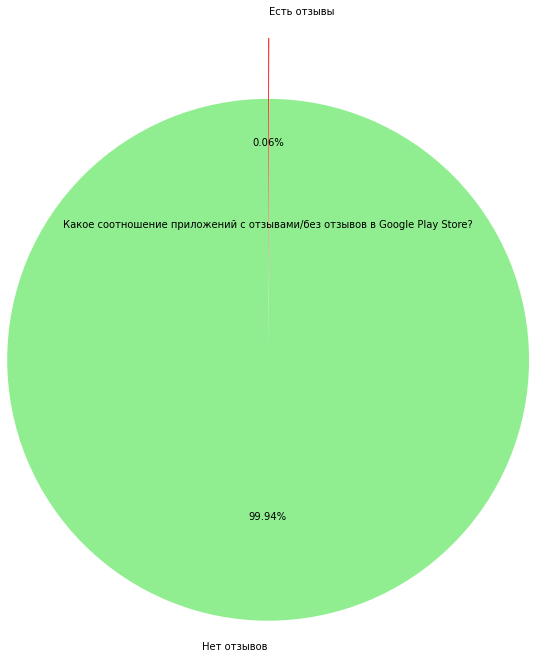

In [80]:
plt.pie(df['Editors Choice'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['lightgreen','red'],labels=['Нет отзывов','Есть отзывы'],
        startangle=90)
plt.title('Какое соотношение приложений с отзывами/без отзывов в Google Play Store?',fontdict={'size':10})
plt.plot()

In [328]:
category = df[df['Editors Choice'] == False]
df.category_choice = category.groupby(['Category'])['Editors Choice'].count().sort_values(ascending  =False).reset_index()
df.category_choice.head(20)

,Category,Editors Choice
0,Education,188669
1,Music & Audio,135118
2,Business,118885
3,Entertainment,107121
4,Tools,101733
5,Lifestyle,100697
6,Books & Reference,89332
7,Personalization,70359
8,Health & Fitness,68705
9,Shopping,63009


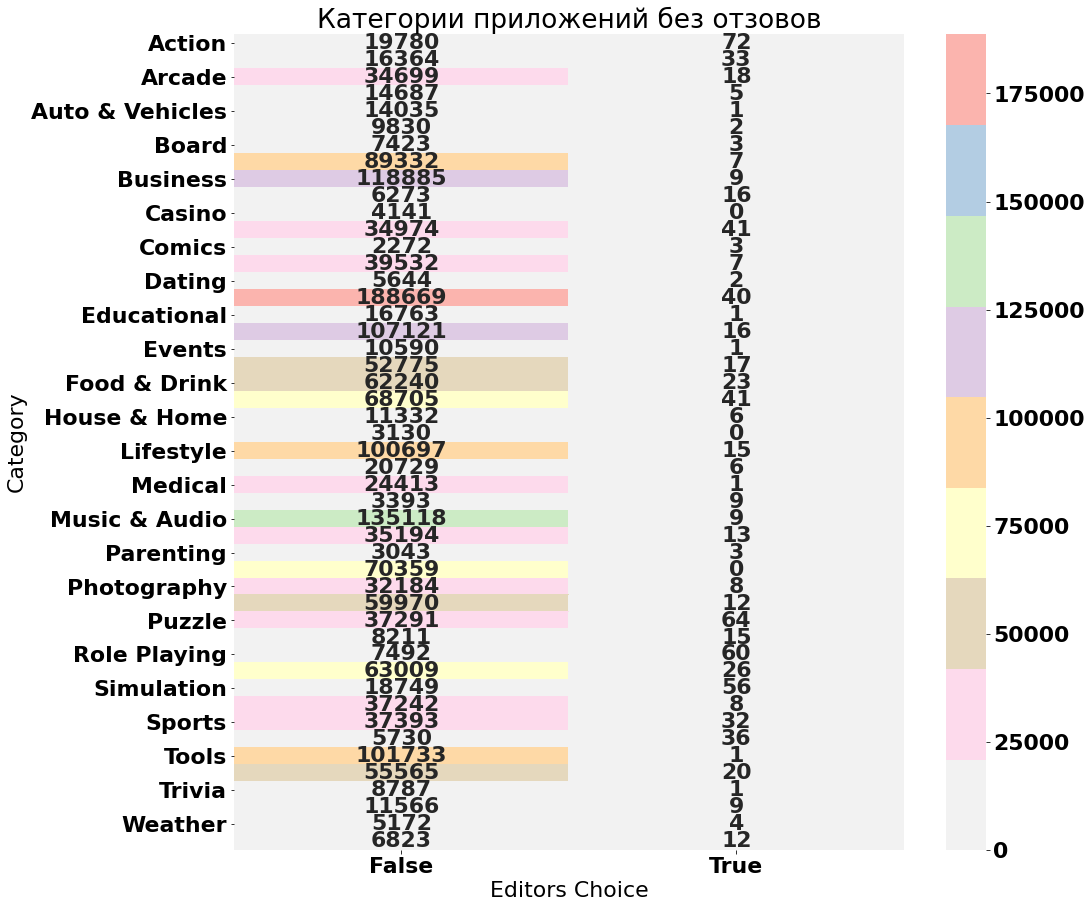

In [331]:
plt.figure(figsize=(15,15))
plt.title("Категории приложений без отзовов")
sns.heatmap(pd.crosstab(df['Category'], df['Editors Choice']),annot=True,fmt='g', cmap="Pastel1_r")
plt.show()

## Рейтинг коннекта

In [17]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [18]:
df['Content Rating'] = df['Content Rating'].astype('category')

In [19]:
df['Category'] = df['Category'].astype('category')

In [48]:
df.dtypes

App Name               object
App Id                 object
Category             category
Rating                float64
Rating Count          float64
Installs               object
Minimum Installs      float64
Maximum Installs        int64
Free                     bool
Price                 float64
Currency               object
Size                   object
Minimum Android        object
Developer Id           object
Developer Website      object
Developer Email        object
Released               object
Last Updated           object
Content Rating       category
Privacy Policy         object
Ad Supported             bool
In App Purchases         bool
Editors Choice           bool
Scraped Time           object
dtype: object

C:\Users\UserNC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


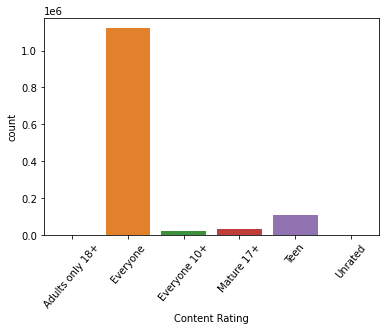

In [37]:
sns.countplot(df['Content Rating'])
plt.xticks(rotation='50')
plt.show()

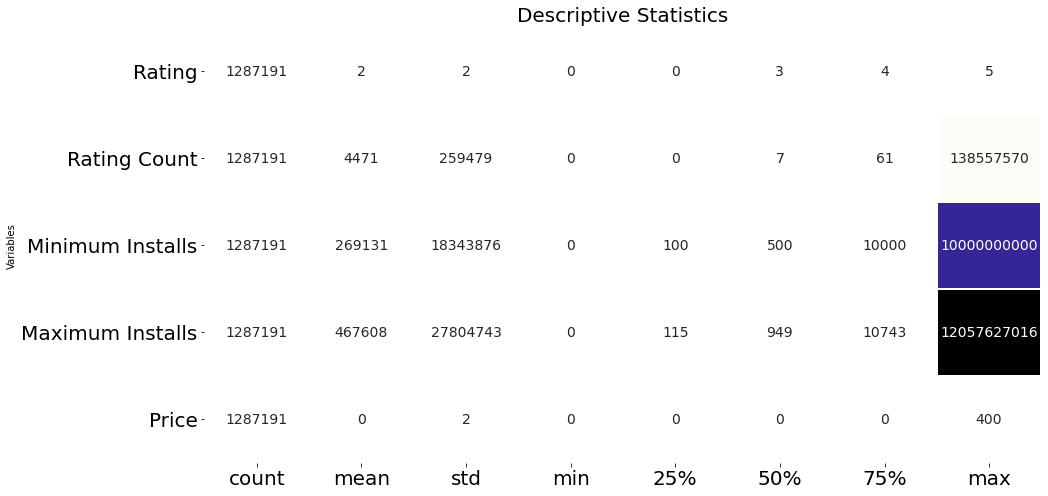

In [18]:
# Общая статистика приложения только с рейтингом больше 4-х
desc = df.describe().T

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='.00f', 
            ax=ax, linewidths=1, cbar=False,
            annot_kws={'size': 14})
plt.xticks(size = 20)
plt.yticks(size = 20, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 20)
plt.show()

In [129]:
## Конвертация дат в удобный формат 
df['Released'] = pd.to_datetime(df['Released'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')

In [130]:
df.Released


0         2020-02-26
1         2020-05-21
4         2020-02-21
5         2018-12-24
9         2019-09-22
             ...    
2312933   2014-12-11
2312934   2020-06-15
2312938   2018-05-22
2312940   2018-01-17
2312942   2016-08-01
Name: Released, Length: 1287191, dtype: datetime64[ns]

Model building- потроение модели